<a href="https://colab.research.google.com/github/aaldifauzan/ML-UTS-UAS/blob/main/ML_UAS_ALDI_FAUZAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tensor Basic

In [23]:
import torch

x = torch.empty(1)
print(x)
x = torch.empty(3)
print(x)
x = torch.empty(2, 3)
print(x)
x = torch.empty(2, 2, 3)
print(x)

x = torch.rand(5, 3)
print(x)

x = torch.zeros(5, 3)
print(x)

print(x.size())

print(x.dtype)

x = torch.zeros(5, 3, dtype=torch.float16)
print(x)

print(x.dtype)

x = torch.tensor([5.5, 3])
print(x.size())

x = torch.tensor([5.5, 3], requires_grad=True)

y = torch.rand(2, 2)
x = torch.rand(2, 2)

z = x + y
z = x - y
z = x * y
z = x / y

x = torch.rand(5, 3)
print(x)
print(x[:, 0])
print(x[1, :])
print(x[1, 1])
print(x[1, 1].item())

x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)
print(x.size(), y.size(), z.size())

a = torch.ones(5)
print(a)

b = a.numpy()
print(b)
print(type(b))

a.add_(1)
print(a)
print(b)

import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
print(a)
print(b)

a += 1
print(a)
print(b)

if torch.cuda.is_available():
    device = torch.device("cuda")
    y = torch.ones_like(x, device=device)
    x = x.to(device)
    z = x + y
    z.to("cpu")


tensor([-3.3267e+28])
tensor([ 2.1740e+04,  0.0000e+00, -3.9651e-30])
tensor([[-3.1460e-30,  0.0000e+00, -3.3267e+28],
        [ 4.5616e-41,  4.4842e-44,  0.0000e+00]])
tensor([[[-3.3268e+28,  4.5616e-41, -3.3268e+28],
         [ 4.5616e-41,  4.4842e-44,  0.0000e+00]],

        [[ 8.9683e-44,  0.0000e+00, -1.9120e-30],
         [ 0.0000e+00,  1.1210e-44,  0.0000e+00]]])
tensor([[0.8553, 0.6115, 0.3017],
        [0.3082, 0.2181, 0.6556],
        [0.0348, 0.3989, 0.0663],
        [0.5060, 0.7245, 0.9402],
        [0.5271, 0.6551, 0.5382]])
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
torch.Size([5, 3])
torch.float32
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], dtype=torch.float16)
torch.float16
torch.Size([2])
tensor([[0.0536, 0.6430, 0.7241],
        [0.4456, 0.6678, 0.5869],
        [0.6155, 0.2325, 0.6360],
        [0.5845, 0.2181, 0.7900],
        [0.961

Autograd

In [24]:
import torch

x = torch.randn(3, requires_grad=True)
y = x + 2

print(x)
print(y)
print(y.grad_fn)

z = y * y * 3
print(z)
z = z.mean()
print(z)

z.backward()
print(x.grad)

x = torch.randn(3, requires_grad=True)

y = x * 2
for _ in range(10):
    y = y * 2

print(y)
print(y.shape)

v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float32)
y.backward(v)
print(x.grad)

a = torch.randn(2, 2)
print(a.requires_grad)
b = ((a * 3) / (a - 1))
print(b.grad_fn)
a.requires_grad_(True)
print(a.requires_grad)
b = (a * a).sum()
print(b.grad_fn)

a = torch.randn(2, 2, requires_grad=True)
print(a.requires_grad)
b = a.detach()
print(b.requires_grad)

a = torch.randn(2, 2, requires_grad=True)
print(a.requires_grad)
with torch.no_grad():
    print((x ** 2).requires_grad)

weights = torch.ones(4, requires_grad=True)

for epoch in range(3):
    model_output = (weights * 3).sum()
    model_output.backward()

    print(weights.grad)

    with torch.no_grad():
        weights -= 0.1 * weights.grad

    weights.grad.zero_()

print(weights)
print(model_output)


tensor([0.7355, 0.2005, 0.4452], requires_grad=True)
tensor([2.7355, 2.2005, 2.4452], grad_fn=<AddBackward0>)
tensor([22.4482, 14.5264, 17.9368], grad_fn=<MulBackward0>)
tensor(18.3038, grad_fn=<MeanBackward0>)
tensor([5.4709, 4.4010, 4.8904])
tensor([-4110.9048, -1796.1550, -2179.2964], grad_fn=<MulBackward0>)
torch.Size([3])
tensor([2.0480e+02, 2.0480e+03, 2.0480e-01])
False
None
True
True
False
True
False
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([0.1000, 0.1000, 0.1000, 0.1000], requires_grad=True)
tensor(4.8000, grad_fn=<SumBackward0>)


Backpropagation

In [25]:
import torch

x = torch.tensor(1.0)
y = torch.tensor(2.0)

w = torch.tensor(1.0, requires_grad=True)

y_predicted = w * x
loss = (y_predicted - y)**2
print(loss)

loss.backward()
print(w.grad)

with torch.no_grad():
    w -= 0.01 * w.grad
w.grad.zero_()


tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)


tensor(0.)

Gradientdescent_manually

In [26]:
import numpy as np

X = np.array([1, 2, 3, 4], dtype=np.float32)
Y = np.array([2, 4, 6, 8], dtype=np.float32)

w = 0.0

def forward(x):
    return w * x

def loss(y, y_pred):
    return ((y_pred - y)**2).mean()

def gradient(x, y, y_pred):
    return np.mean(2*x*(y_pred - y))

print(f'Prediction before training: f(5) = {forward(5):.3f}')

learning_rate = 0.01
n_iters = 20

for epoch in range(n_iters):
    y_pred = forward(X)
    l = loss(Y, y_pred)
    dw = gradient(X, Y, y_pred)
    w -= learning_rate * dw

    if epoch % 2 == 0:
        print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}')

print(f'Prediction after training: f(5) = {forward(5):.3f}')

Prediction before training: f(5) = 0.000
epoch 1: w = 0.300, loss = 30.00000000
epoch 3: w = 0.772, loss = 15.66018677
epoch 5: w = 1.113, loss = 8.17471600
epoch 7: w = 1.359, loss = 4.26725292
epoch 9: w = 1.537, loss = 2.22753215
epoch 11: w = 1.665, loss = 1.16278565
epoch 13: w = 1.758, loss = 0.60698175
epoch 15: w = 1.825, loss = 0.31684822
epoch 17: w = 1.874, loss = 0.16539653
epoch 19: w = 1.909, loss = 0.08633806
Prediction after training: f(5) = 9.612


Gradientdescent_auto

In [27]:
import torch

X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

def forward(x):
    return w * x

def loss(y, y_pred):
    return ((y_pred - y)**2).mean()

print(f'Prediction before training: f(5) = {forward(5).item():.3f}')

learning_rate = 0.01
n_iters = 100

for epoch in range(n_iters):
    y_pred = forward(X)
    l = loss(Y, y_pred)
    l.backward()
    with torch.no_grad():
        w -= learning_rate * w.grad
    w.grad.zero_()

    if epoch % 10 == 0:
        print(f'epoch {epoch+1}: w = {w.item():.3f}, loss = {l.item():.8f}')

print(f'Prediction after training: f(5) = {forward(5).item():.3f}')


Prediction before training: f(5) = 0.000
epoch 1: w = 0.300, loss = 30.00000000
epoch 11: w = 1.665, loss = 1.16278565
epoch 21: w = 1.934, loss = 0.04506890
epoch 31: w = 1.987, loss = 0.00174685
epoch 41: w = 1.997, loss = 0.00006770
epoch 51: w = 1.999, loss = 0.00000262
epoch 61: w = 2.000, loss = 0.00000010
epoch 71: w = 2.000, loss = 0.00000000
epoch 81: w = 2.000, loss = 0.00000000
epoch 91: w = 2.000, loss = 0.00000000
Prediction after training: f(5) = 10.000


loss_and_optimizer

In [28]:
import torch
import torch.nn as nn

X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

def forward(x):
    return w * x

print(f'Prediction before training: f(5) = {forward(5).item():.3f}')

learning_rate = 0.01
n_iters = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD([w], lr=learning_rate)

for epoch in range(n_iters):
    y_predicted = forward(X)
    l = loss(Y, y_predicted)
    l.backward()
    optimizer.step()
    optimizer.zero_grad()

    if epoch % 10 == 0:
        print('epoch ', epoch+1, ': w = ', w, ' loss = ', l)

print(f'Prediction after training: f(5) = {forward(5).item():.3f}')


Prediction before training: f(5) = 0.000
epoch  1 : w =  tensor(0.3000, requires_grad=True)  loss =  tensor(30., grad_fn=<MseLossBackward0>)
epoch  11 : w =  tensor(1.6653, requires_grad=True)  loss =  tensor(1.1628, grad_fn=<MseLossBackward0>)
epoch  21 : w =  tensor(1.9341, requires_grad=True)  loss =  tensor(0.0451, grad_fn=<MseLossBackward0>)
epoch  31 : w =  tensor(1.9870, requires_grad=True)  loss =  tensor(0.0017, grad_fn=<MseLossBackward0>)
epoch  41 : w =  tensor(1.9974, requires_grad=True)  loss =  tensor(6.7705e-05, grad_fn=<MseLossBackward0>)
epoch  51 : w =  tensor(1.9995, requires_grad=True)  loss =  tensor(2.6244e-06, grad_fn=<MseLossBackward0>)
epoch  61 : w =  tensor(1.9999, requires_grad=True)  loss =  tensor(1.0176e-07, grad_fn=<MseLossBackward0>)
epoch  71 : w =  tensor(2.0000, requires_grad=True)  loss =  tensor(3.9742e-09, grad_fn=<MseLossBackward0>)
epoch  81 : w =  tensor(2.0000, requires_grad=True)  loss =  tensor(1.4670e-10, grad_fn=<MseLossBackward0>)
epoch  

model_loss_and_ optimizer

In [29]:
import torch
import torch.nn as nn

X = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)
Y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32)

n_samples, n_features = X.shape
print(f'#samples: {n_samples}, #features: {n_features}')

X_test = torch.tensor([5], dtype=torch.float32)

input_size = n_features
output_size = n_features

model = nn.Linear(input_size, output_size)

print(f'Prediction before training: f(5) = {model(X_test).item():.3f}')

learning_rate = 0.01
n_iters = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(n_iters):
    y_predicted = model(X)
    l = loss(Y, y_predicted)
    l.backward()
    optimizer.step()
    optimizer.zero_grad()

    if epoch % 10 == 0:
        [w, b] = model.parameters()
        print('epoch ', epoch+1, ': w = ', w[0][0].item(), ' loss = ', l)

print(f'Prediction after training: f(5) = {model(X_test).item():.3f}')


#samples: 4, #features: 1
Prediction before training: f(5) = -2.560
epoch  1 : w =  -0.3059455156326294  loss =  tensor(43.6123, grad_fn=<MseLossBackward0>)
epoch  11 : w =  1.2149543762207031  loss =  tensor(1.4764, grad_fn=<MseLossBackward0>)
epoch  21 : w =  1.471822738647461  loss =  tensor(0.3660, grad_fn=<MseLossBackward0>)
epoch  31 : w =  1.5250115394592285  loss =  tensor(0.3182, grad_fn=<MseLossBackward0>)
epoch  41 : w =  1.5450879335403442  loss =  tensor(0.2990, grad_fn=<MseLossBackward0>)
epoch  51 : w =  1.5594979524612427  loss =  tensor(0.2816, grad_fn=<MseLossBackward0>)
epoch  61 : w =  1.5726664066314697  loss =  tensor(0.2652, grad_fn=<MseLossBackward0>)
epoch  71 : w =  1.5853145122528076  loss =  tensor(0.2498, grad_fn=<MseLossBackward0>)
epoch  81 : w =  1.5975679159164429  loss =  tensor(0.2352, grad_fn=<MseLossBackward0>)
epoch  91 : w =  1.609455943107605  loss =  tensor(0.2215, grad_fn=<MseLossBackward0>)
Prediction after training: f(5) = 9.217


linear_regression

epoch: 10, loss = 4084.5444
epoch: 20, loss = 2876.8594
epoch: 30, loss = 2053.9338
epoch: 40, loss = 1493.0621
epoch: 50, loss = 1110.7124
epoch: 60, loss = 850.0061
epoch: 70, loss = 672.2062
epoch: 80, loss = 550.9227
epoch: 90, loss = 468.1750
epoch: 100, loss = 411.7077


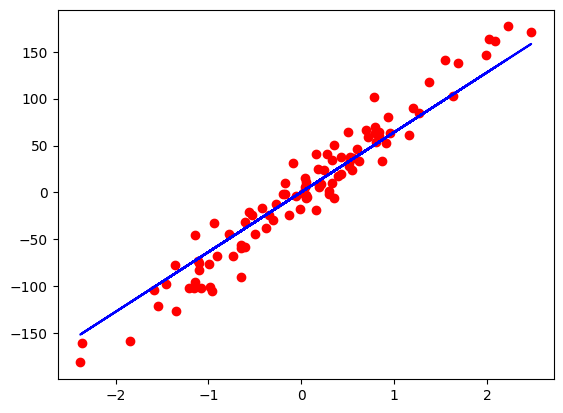

In [30]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt


X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)


X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape


input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)


learning_rate = 0.01

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


num_epochs = 100
for epoch in range(num_epochs):

    y_predicted = model(X)
    loss = criterion(y_predicted, y)


    loss.backward()
    optimizer.step()


    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')


predicted = model(X).detach().numpy()

plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()

logistic_regression

In [31]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

n_samples, n_features = X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)


sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)


class Model(nn.Module):
    def __init__(self, n_input_features):
        super(Model, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)

    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

model = Model(n_features)


num_epochs = 100
learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


for epoch in range(num_epochs):

    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)


    loss.backward()
    optimizer.step()


    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')


with torch.no_grad():
    y_predicted = model(X_test)
    y_predicted_cls = y_predicted.round()
    acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
    print(f'accuracy: {acc.item():.4f}')

epoch: 10, loss = 0.6974
epoch: 20, loss = 0.5317
epoch: 30, loss = 0.4387
epoch: 40, loss = 0.3806
epoch: 50, loss = 0.3407
epoch: 60, loss = 0.3114
epoch: 70, loss = 0.2886
epoch: 80, loss = 0.2704
epoch: 90, loss = 0.2553
epoch: 100, loss = 0.2426
accuracy: 0.9211


Dataloader

In [32]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math





class WineDataset(Dataset):

    def __init__(self):

        xy = np.loadtxt('./wine.csv', delimiter=',', dtype=np.float32, skiprows=1)
        self.n_samples = xy.shape[0]


        self.x_data = torch.from_numpy(xy[:, 1:])
        self.y_data = torch.from_numpy(xy[:, [0]])


    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]


    def __len__(self):
        return self.n_samples



dataset = WineDataset()


first_data = dataset[0]
features, labels = first_data
print(features, labels)


train_loader = DataLoader(dataset=dataset,
                          batch_size=4,
                          shuffle=True,
                          num_workers=2)


dataiter = iter(train_loader)
data = next(dataiter)
features, labels = data
print(features, labels)


num_epochs = 2
total_samples = len(dataset)
n_iterations = math.ceil(total_samples/4)
print(total_samples, n_iterations)
for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(train_loader):


        if (i+1) % 5 == 0:
            print(f'Epoch: {epoch+1}/{num_epochs}, Step {i+1}/{n_iterations}| Inputs {inputs.shape} | Labels {labels.shape}')

train_dataset = torchvision.datasets.MNIST(root='./data',
                                           train=True,
                                           transform=torchvision.transforms.ToTensor(),
                                           download=True)

train_loader = DataLoader(dataset=train_dataset,
                                           batch_size=3,
                                           shuffle=True)

dataiter = iter(train_loader)
data = next(dataiter)
inputs, targets = data
print(inputs.shape, targets.shape)

tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03]) tensor([1.])
tensor([[1.2330e+01, 1.1000e+00, 2.2800e+00, 1.6000e+01, 1.0100e+02, 2.0500e+00,
         1.0900e+00, 6.3000e-01, 4.1000e-01, 3.2700e+00, 1.2500e+00, 1.6700e+00,
         6.8000e+02],
        [1.4210e+01, 4.0400e+00, 2.4400e+00, 1.8900e+01, 1.1100e+02, 2.8500e+00,
         2.6500e+00, 3.0000e-01, 1.2500e+00, 5.2400e+00, 8.7000e-01, 3.3300e+00,
         1.0800e+03],
        [1.3400e+01, 3.9100e+00, 2.4800e+00, 2.3000e+01, 1.0200e+02, 1.8000e+00,
         7.5000e-01, 4.3000e-01, 1.4100e+00, 7.3000e+00, 7.0000e-01, 1.5600e+00,
         7.5000e+02],
        [1.3500e+01, 1.8100e+00, 2.6100e+00, 2.0000e+01, 9.6000e+01, 2.5300e+00,
         2.6100e+00, 2.8000e-01, 1.6600e+00, 3.5200e+00, 1.1200e+00, 3.8200e+00,
         8.4500e+02]]) tensor([[2.],
        [1.],
        [3.],
        [1.]])
178 45
Epoch

Transformer

In [33]:
import torch
import torchvision
from torch.utils.data import Dataset
import numpy as np


class WineDataset(Dataset):

    def __init__(self, transform=None):
        xy = np.loadtxt('./wine.csv', delimiter=',', dtype=np.float32, skiprows=1)
        self.n_samples = xy.shape[0]


        self.x_data = xy[:, 1:]
        self.y_data = xy[:, [0]]

        self.transform = transform

    def __getitem__(self, index):
        sample = self.x_data[index], self.y_data[index]

        if self.transform:
            sample = self.transform(sample)

        return sample

    def __len__(self):
        return self.n_samples


class ToTensor:

    def __call__(self, sample):
        inputs, targets = sample
        return torch.from_numpy(inputs), torch.from_numpy(targets)

class MulTransform:

    def __init__(self, factor):
        self.factor = factor

    def __call__(self, sample):
        inputs, targets = sample
        inputs *= self.factor
        return inputs, targets

print('Without Transform')
dataset = WineDataset()
first_data = dataset[0]
features, labels = first_data
print(type(features), type(labels))
print(features, labels)

print('\nWith Tensor Transform')
dataset = WineDataset(transform=ToTensor())
first_data = dataset[0]
features, labels = first_data
print(type(features), type(labels))
print(features, labels)

print('\nWith Tensor and Multiplication Transform')
composed = torchvision.transforms.Compose([ToTensor(), MulTransform(4)])
dataset = WineDataset(transform=composed)
first_data = dataset[0]
features, labels = first_data
print(type(features), type(labels))
print(features, labels)

Without Transform
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03] [1.]

With Tensor Transform
<class 'torch.Tensor'> <class 'torch.Tensor'>
tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03]) tensor([1.])

With Tensor and Multiplication Transform
<class 'torch.Tensor'> <class 'torch.Tensor'>
tensor([5.6920e+01, 6.8400e+00, 9.7200e+00, 6.2400e+01, 5.0800e+02, 1.1200e+01,
        1.2240e+01, 1.1200e+00, 9.1600e+00, 2.2560e+01, 4.1600e+00, 1.5680e+01,
        4.2600e+03]) tensor([1.])


softmax_and_crossentropy

In [34]:
import torch
import torch.nn as nn
import numpy as np


def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

x = np.array([2.0, 1.0, 0.1])
outputs = softmax(x)
print('softmax numpy:', outputs)

x = torch.tensor([2.0, 1.0, 0.1])
outputs = torch.softmax(x, dim=0)
print('softmax torch:', outputs)


def cross_entropy(actual, predicted):
    EPS = 1e-15
    predicted = np.clip(predicted, EPS, 1 - EPS)
    loss = -np.sum(actual * np.log(predicted))
    return loss # / float(predicted.shape[0])


Y = np.array([1, 0, 0])
Y_pred_good = np.array([0.7, 0.2, 0.1])
Y_pred_bad = np.array([0.1, 0.3, 0.6])
l1 = cross_entropy(Y, Y_pred_good)
l2 = cross_entropy(Y, Y_pred_bad)
print(f'Loss1 numpy: {l1:.4f}')
print(f'Loss2 numpy: {l2:.4f}')


loss = nn.CrossEntropyLoss()

Y = torch.tensor([0])


Y_pred_good = torch.tensor([[2.0, 1.0, 0.1]])
Y_pred_bad = torch.tensor([[0.5, 2.0, 0.3]])
l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)

print(f'PyTorch Loss1: {l1.item():.4f}')
print(f'PyTorch Loss2: {l2.item():.4f}')


_, predictions1 = torch.max(Y_pred_good, 1)
_, predictions2 = torch.max(Y_pred_bad, 1)
print(f'Actual class: {Y.item()}, Y_pred1: {predictions1.item()}, Y_pred2: {predictions2.item()}')


Y = torch.tensor([2, 0, 1])


Y_pred_good = torch.tensor(
    [[0.1, 0.2, 3.9],
    [1.2, 0.1, 0.3],
    [0.3, 2.2, 0.2]])

Y_pred_bad = torch.tensor(
    [[0.9, 0.2, 0.1],
    [0.1, 0.3, 1.5],
    [1.2, 0.2, 0.5]])

l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)
print(f'Batch Loss1:  {l1.item():.4f}')
print(f'Batch Loss2: {l2.item():.4f}')


_, predictions1 = torch.max(Y_pred_good, 1)
_, predictions2 = torch.max(Y_pred_bad, 1)
print(f'Actual class: {Y}, Y_pred1: {predictions1}, Y_pred2: {predictions2}')


class NeuralNet1(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet1, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)

        y_pred = torch.sigmoid(out)
        return y_pred

model = NeuralNet1(input_size=28*28, hidden_size=5)
criterion = nn.BCELoss()


class NeuralNet2(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet2, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)

        return out

model = NeuralNet2(input_size=28*28, hidden_size=5, num_classes=3)
criterion = nn.CrossEntropyLoss()


softmax numpy: [0.65900114 0.24243297 0.09856589]
softmax torch: tensor([0.6590, 0.2424, 0.0986])
Loss1 numpy: 0.3567
Loss2 numpy: 2.3026
PyTorch Loss1: 0.4170
PyTorch Loss2: 1.8406
Actual class: 0, Y_pred1: 0, Y_pred2: 1
Batch Loss1:  0.2834
Batch Loss2: 1.6418
Actual class: tensor([2, 0, 1]), Y_pred1: tensor([2, 0, 1]), Y_pred2: tensor([0, 2, 0])


activation_functions

In [35]:
import torch
import torch.nn as nn
import torch.nn.functional as F

x = torch.tensor([-1.0, 1.0, 2.0, 3.0])


output = torch.softmax(x, dim=0)
print(output)
sm = nn.Softmax(dim=0)
output = sm(x)
print(output)


output = torch.sigmoid(x)
print(output)
s = nn.Sigmoid()
output = s(x)
print(output)


output = torch.tanh(x)
print(output)
t = nn.Tanh()
output = t(x)
print(output)


output = torch.relu(x)
print(output)
relu = nn.ReLU()
output = relu(x)
print(output)


output = F.leaky_relu(x)
print(output)
lrelu = nn.LeakyReLU()
output = lrelu(x)
print(output)




class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        out = self.sigmoid(out)
        return out


class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out = torch.relu(self.linear1(x))
        out = torch.sigmoid(self.linear2(out))
        return out

tensor([0.0120, 0.0889, 0.2418, 0.6572])
tensor([0.0120, 0.0889, 0.2418, 0.6572])
tensor([0.2689, 0.7311, 0.8808, 0.9526])
tensor([0.2689, 0.7311, 0.8808, 0.9526])
tensor([-0.7616,  0.7616,  0.9640,  0.9951])
tensor([-0.7616,  0.7616,  0.9640,  0.9951])
tensor([0., 1., 2., 3.])
tensor([0., 1., 2., 3.])
tensor([-0.0100,  1.0000,  2.0000,  3.0000])
tensor([-0.0100,  1.0000,  2.0000,  3.0000])


plot_activations

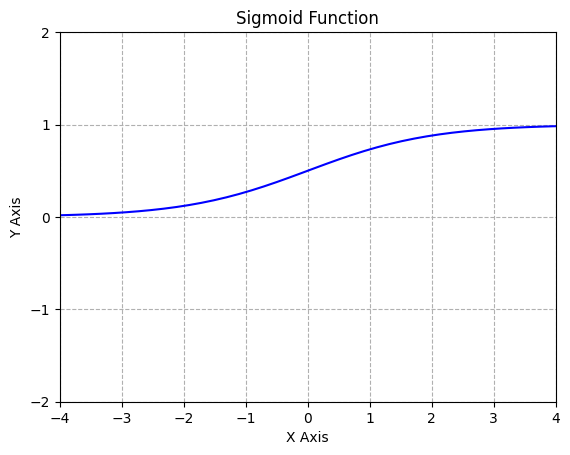

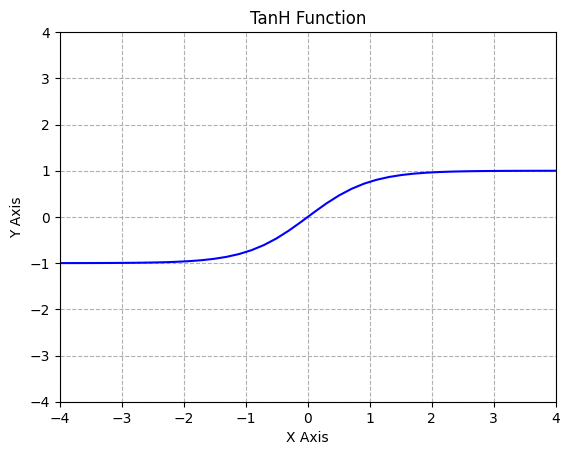

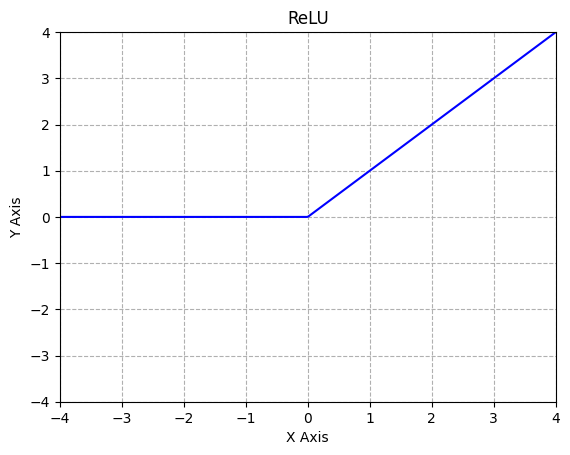

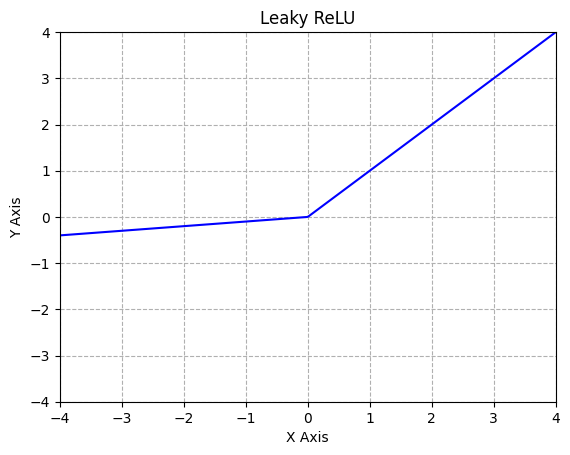

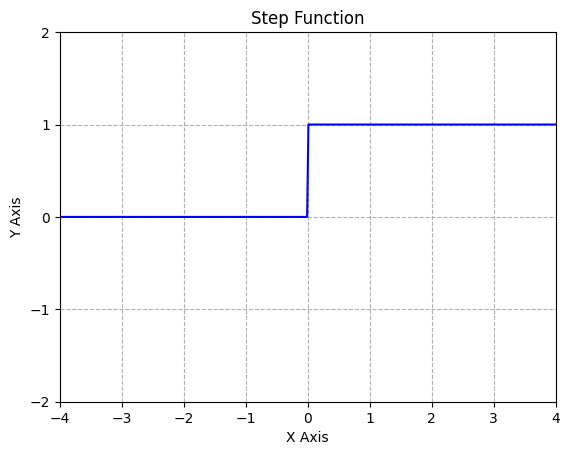

done


In [36]:
import numpy as np
import matplotlib.pyplot as plt


sigmoid = lambda x: 1 / (1 + np.exp(-x))

x=np.linspace(-10,10,10)

y=np.linspace(-10,10,100)

fig = plt.figure()
plt.plot(y,sigmoid(y),'b', label='linspace(-10,10,100)')

plt.grid(linestyle='--')

plt.xlabel('X Axis')

plt.ylabel('Y Axis')

plt.title('Sigmoid Function')

plt.xticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.yticks([-2, -1, 0, 1, 2])

plt.ylim(-2, 2)
plt.xlim(-4, 4)

plt.show()


fig = plt.figure()


tanh = lambda x: 2*sigmoid(2*x)-1

x=np.linspace(-10,10,10)

y=np.linspace(-10,10,100)

plt.plot(y,tanh(y),'b', label='linspace(-10,10,100)')

plt.grid(linestyle='--')

plt.xlabel('X Axis')

plt.ylabel('Y Axis')

plt.title('TanH Function')

plt.xticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.yticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])

plt.ylim(-4, 4)
plt.xlim(-4, 4)

plt.show()


fig = plt.figure()


relu = lambda x: np.where(x>=0, x, 0)

x=np.linspace(-10,10,10)

y=np.linspace(-10,10,1000)

plt.plot(y,relu(y),'b', label='linspace(-10,10,100)')

plt.grid(linestyle='--')

plt.xlabel('X Axis')

plt.ylabel('Y Axis')

plt.title('ReLU')

plt.xticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.yticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])

plt.ylim(-4, 4)
plt.xlim(-4, 4)

plt.show()


fig = plt.figure()


leakyrelu = lambda x: np.where(x>=0, x, 0.1*x)

x=np.linspace(-10,10,10)

y=np.linspace(-10,10,1000)

plt.plot(y,leakyrelu(y),'b', label='linspace(-10,10,100)')

plt.grid(linestyle='--')

plt.xlabel('X Axis')

plt.ylabel('Y Axis')

plt.title('Leaky ReLU')

plt.xticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.yticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])

plt.ylim(-4, 4)
plt.xlim(-4, 4)

plt.show()


fig = plt.figure()



bstep = lambda x: np.where(x>=0, 1, 0)

x=np.linspace(-10,10,10)

y=np.linspace(-10,10,1000)

plt.plot(y,bstep(y),'b', label='linspace(-10,10,100)')

plt.grid(linestyle='--')

plt.xlabel('X Axis')

plt.ylabel('Y Axis')

plt.title('Step Function')

plt.xticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.yticks([-2, -1, 0, 1, 2])

plt.ylim(-2, 2)
plt.xlim(-4, 4)

plt.show()


print('done')

feedforward

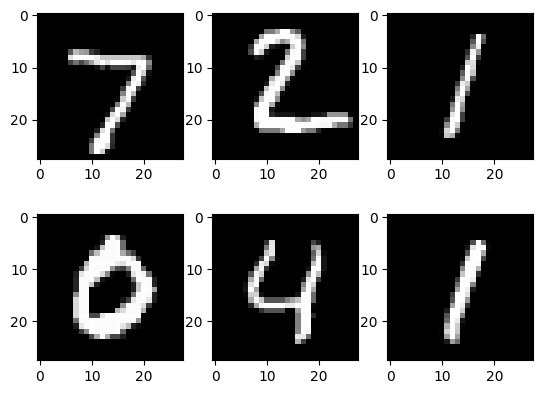

Epoch [1/2], Step [100/600], Loss: 0.3502
Epoch [1/2], Step [200/600], Loss: 0.2945
Epoch [1/2], Step [300/600], Loss: 0.2487
Epoch [1/2], Step [400/600], Loss: 0.3034
Epoch [1/2], Step [500/600], Loss: 0.2910
Epoch [1/2], Step [600/600], Loss: 0.1388
Epoch [2/2], Step [100/600], Loss: 0.1238
Epoch [2/2], Step [200/600], Loss: 0.0728
Epoch [2/2], Step [300/600], Loss: 0.1115
Epoch [2/2], Step [400/600], Loss: 0.0551
Epoch [2/2], Step [500/600], Loss: 0.1053
Epoch [2/2], Step [600/600], Loss: 0.1566
Accuracy of the network on the 10000 test images: 96.87 %


In [37]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001


train_dataset = torchvision.datasets.MNIST(root='./data',
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data',
                                          train=False,
                                          transform=transforms.ToTensor())


train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

examples = iter(test_loader)
example_data, example_targets = next(examples)

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(example_data[i][0], cmap='gray')
plt.show()


class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)


criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)


        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')


with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)

        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')

cnn

Files already downloaded and verified
Files already downloaded and verified


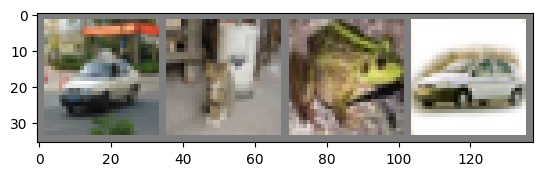

Epoch [1/5], Step [2000/12500], Loss: 2.2862
Epoch [1/5], Step [4000/12500], Loss: 2.3394
Epoch [1/5], Step [6000/12500], Loss: 2.2755
Epoch [1/5], Step [8000/12500], Loss: 2.2567
Epoch [1/5], Step [10000/12500], Loss: 2.2109
Epoch [1/5], Step [12000/12500], Loss: 2.2987
Epoch [2/5], Step [2000/12500], Loss: 2.0294
Epoch [2/5], Step [4000/12500], Loss: 1.9671
Epoch [2/5], Step [6000/12500], Loss: 2.2132
Epoch [2/5], Step [8000/12500], Loss: 1.7648
Epoch [2/5], Step [10000/12500], Loss: 1.4464
Epoch [2/5], Step [12000/12500], Loss: 1.6852
Epoch [3/5], Step [2000/12500], Loss: 1.5887
Epoch [3/5], Step [4000/12500], Loss: 0.9761
Epoch [3/5], Step [6000/12500], Loss: 1.1832
Epoch [3/5], Step [8000/12500], Loss: 1.2568
Epoch [3/5], Step [10000/12500], Loss: 1.1725
Epoch [3/5], Step [12000/12500], Loss: 1.8279
Epoch [4/5], Step [2000/12500], Loss: 1.6543
Epoch [4/5], Step [4000/12500], Loss: 1.8332
Epoch [4/5], Step [6000/12500], Loss: 1.7404
Epoch [4/5], Step [8000/12500], Loss: 2.1544
Epoc

In [38]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


num_epochs = 5
batch_size = 4
learning_rate = 0.001


transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()



dataiter = iter(train_loader)
images, labels = next(dataiter)


imshow(torchvision.utils.make_grid(images))

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):

        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


model = ConvNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.to(device)
        labels = labels.to(device)


        outputs = model(images)
        loss = criterion(outputs, labels)


        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 2000 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

print('Finished Training')
PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)

with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)

        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')

transfer_learning

In [42]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


['ants', 'bees']


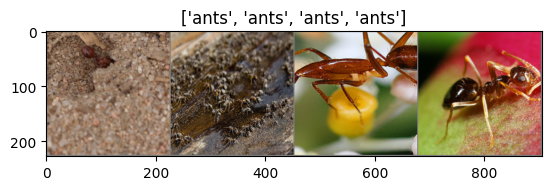

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 237MB/s]


Epoch 0/24
----------
train Loss: 0.6413 Acc: 0.6393
val Loss: 0.4548 Acc: 0.7974

Epoch 1/24
----------
train Loss: 0.5427 Acc: 0.7254
val Loss: 0.3192 Acc: 0.8954

Epoch 2/24
----------
train Loss: 0.4745 Acc: 0.7664
val Loss: 0.2739 Acc: 0.9150

Epoch 3/24
----------
train Loss: 0.4302 Acc: 0.7910
val Loss: 0.2321 Acc: 0.9477

Epoch 4/24
----------
train Loss: 0.4034 Acc: 0.8197
val Loss: 0.2128 Acc: 0.9020

Epoch 5/24
----------
train Loss: 0.3388 Acc: 0.8566
val Loss: 0.2106 Acc: 0.9085

Epoch 6/24
----------
train Loss: 0.3034 Acc: 0.8893
val Loss: 0.2010 Acc: 0.9150

Epoch 7/24
----------
train Loss: 0.3363 Acc: 0.8689
val Loss: 0.1902 Acc: 0.9085

Epoch 8/24
----------
train Loss: 0.3660 Acc: 0.8402
val Loss: 0.1823 Acc: 0.9281

Epoch 9/24
----------
train Loss: 0.3784 Acc: 0.8156
val Loss: 0.1929 Acc: 0.9150

Epoch 10/24
----------
train Loss: 0.3466 Acc: 0.8525
val Loss: 0.1911 Acc: 0.9150

Epoch 11/24
----------
train Loss: 0.4121 Acc: 0.7910
val Loss: 0.1901 Acc: 0.9150

Ep

In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

mean = np.array([0.5, 0.5, 0.5])
std = np.array([0.25, 0.25, 0.25])

data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ]),
}

data_dir = '/content/gdrive/MyDrive/dataset/hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=0)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(class_names)


def imshow(inp, title):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    plt.title(title)
    plt.show()



inputs, classes = next(iter(dataloaders['train']))


out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)


        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0


            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)


                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)


                    if phase == 'train':
                        optimizer.zero_grad()
                        loss.backward()
                        optimizer.step()


                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))


            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))


    model.load_state_dict(best_model_wts)
    return model




model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features

model.fc = nn.Linear(num_ftrs, 2)

model = model.to(device)

criterion = nn.CrossEntropyLoss()


optimizer = optim.SGD(model.parameters(), lr=0.001)



step_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

model = train_model(model, criterion, optimizer, step_lr_scheduler, num_epochs=25)



model_conv = torchvision.models.resnet18(pretrained=True)
for param in model_conv.parameters():
    param.requires_grad = False


num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)


exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

model_conv = train_model(model_conv, criterion, optimizer_conv,
                         exp_lr_scheduler, num_epochs=25)

Tensorboard

Epoch [1/1], Step [100/938], Loss: 0.2287
Epoch [1/1], Step [200/938], Loss: 0.3183
Epoch [1/1], Step [300/938], Loss: 0.1463
Epoch [1/1], Step [400/938], Loss: 0.1693
Epoch [1/1], Step [500/938], Loss: 0.1113
Epoch [1/1], Step [600/938], Loss: 0.1603
Epoch [1/1], Step [700/938], Loss: 0.1184
Epoch [1/1], Step [800/938], Loss: 0.2901
Epoch [1/1], Step [900/938], Loss: 0.0385
Accuracy of the network on the 10000 test images: 96.44 %


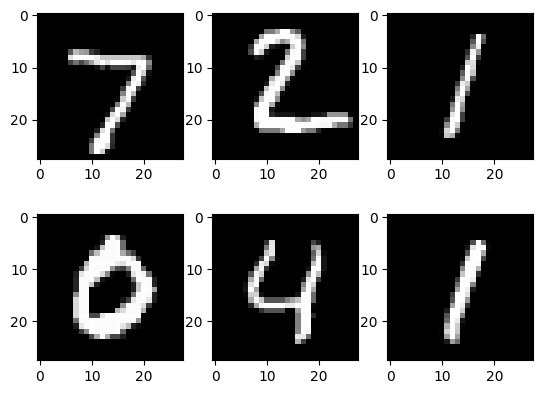

In [40]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


import sys
import torch.nn.functional as F
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter('runs/mnist1')



device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 1
batch_size = 64
learning_rate = 0.001


train_dataset = torchvision.datasets.MNIST(root='./data',
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data',
                                          train=False,
                                          transform=transforms.ToTensor())


train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

examples = iter(test_loader)
example_data, example_targets = next(examples)

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(example_data[i][0], cmap='gray')

img_grid = torchvision.utils.make_grid(example_data)
writer.add_image('mnist_images', img_grid)



class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)

        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)


criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


writer.add_graph(model, example_data.reshape(-1, 28*28).to(device))



running_loss = 0.0
running_correct = 0
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)


        outputs = model(images)
        loss = criterion(outputs, labels)


        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        running_correct += (predicted == labels).sum().item()
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

            writer.add_scalar('training loss', running_loss / 100, epoch * n_total_steps + i)
            running_accuracy = running_correct / 100 / predicted.size(0)
            writer.add_scalar('accuracy', running_accuracy, epoch * n_total_steps + i)
            running_correct = 0
            running_loss = 0.0

class_labels = []
class_preds = []
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        values, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

        class_probs_batch = [F.softmax(output, dim=0) for output in outputs]

        class_preds.append(class_probs_batch)
        class_labels.append(labels)


    class_preds = torch.cat([torch.stack(batch) for batch in class_preds])
    class_labels = torch.cat(class_labels)

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')

    classes = range(10)
    for i in classes:
        labels_i = class_labels == i
        preds_i = class_preds[:, i]
        writer.add_pr_curve(str(i), labels_i, preds_i, global_step=0)
        writer.close()


Saveload

In [41]:
import torch
import torch.nn as nn



class Model(nn.Module):
    def __init__(self, n_input_features):
        super(Model, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)

    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

model = Model(n_input_features=6)

for param in model.parameters():
    print(param)



FILE = "model.pth"
torch.save(model, FILE)

loaded_model = torch.load(FILE)
loaded_model.eval()

for param in loaded_model.parameters():
    print(param)



FILE = "model.pth"
torch.save(model.state_dict(), FILE)

print(model.state_dict())
loaded_model = Model(n_input_features=6)
loaded_model.load_state_dict(torch.load(FILE))
loaded_model.eval()

print(loaded_model.state_dict())



learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

checkpoint = {
"epoch": 90,
"model_state": model.state_dict(),
"optim_state": optimizer.state_dict()
}
print(optimizer.state_dict())
FILE = "checkpoint.pth"
torch.save(checkpoint, FILE)

model = Model(n_input_features=6)
optimizer = torch.optim.SGD(model.parameters(), lr=0)

checkpoint = torch.load(FILE)
model.load_state_dict(checkpoint['model_state'])
optimizer.load_state_dict(checkpoint['optim_state'])
epoch = checkpoint['epoch']

model.eval()


print(optimizer.state_dict())



""" SAVING ON GPU/CPU

# 1) Save on GPU, Load on CPU
device = torch.device("cuda")
model.to(device)
torch.save(model.state_dict(), PATH)

device = torch.device('cpu')
model = Model(*args, **kwargs)
model.load_state_dict(torch.load(PATH, map_location=device))

# 2) Save on GPU, Load on GPU
device = torch.device("cuda")
model.to(device)
torch.save(model.state_dict(), PATH)

model = Model(*args, **kwargs)
model.load_state_dict(torch.load(PATH))
model.to(device)

# Note: Be sure to use the .to(torch.device('cuda')) function
# on all model inputs, too!

# 3) Save on CPU, Load on GPU
torch.save(model.state_dict(), PATH)

device = torch.device("cuda")
model = Model(*args, **kwargs)
model.load_state_dict(torch.load(PATH, map_location="cuda:0"))  # Choose whatever GPU device number you want
model.to(device)

# This loads the model to a given GPU device.
# Next, be sure to call model.to(torch.device('cuda')) to convert the model’s parameter tensors to CUDA tensors
"""

Parameter containing:
tensor([[ 0.3152, -0.3653,  0.3384, -0.2712,  0.4029, -0.2355]],
       requires_grad=True)
Parameter containing:
tensor([-0.1688], requires_grad=True)
Parameter containing:
tensor([[ 0.3152, -0.3653,  0.3384, -0.2712,  0.4029, -0.2355]],
       requires_grad=True)
Parameter containing:
tensor([-0.1688], requires_grad=True)
OrderedDict([('linear.weight', tensor([[ 0.3152, -0.3653,  0.3384, -0.2712,  0.4029, -0.2355]])), ('linear.bias', tensor([-0.1688]))])
OrderedDict([('linear.weight', tensor([[ 0.3152, -0.3653,  0.3384, -0.2712,  0.4029, -0.2355]])), ('linear.bias', tensor([-0.1688]))])
{'state': {}, 'param_groups': [{'lr': 0.01, 'momentum': 0, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'maximize': False, 'foreach': None, 'differentiable': False, 'params': [0, 1]}]}
{'state': {}, 'param_groups': [{'lr': 0.01, 'momentum': 0, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'maximize': False, 'foreach': None, 'differentiable': False, 'params': [0, 

' SAVING ON GPU/CPU\n\n# 1) Save on GPU, Load on CPU\ndevice = torch.device("cuda")\nmodel.to(device)\ntorch.save(model.state_dict(), PATH)\n\ndevice = torch.device(\'cpu\')\nmodel = Model(*args, **kwargs)\nmodel.load_state_dict(torch.load(PATH, map_location=device))\n\n# 2) Save on GPU, Load on GPU\ndevice = torch.device("cuda")\nmodel.to(device)\ntorch.save(model.state_dict(), PATH)\n\nmodel = Model(*args, **kwargs)\nmodel.load_state_dict(torch.load(PATH))\nmodel.to(device)\n\n# Note: Be sure to use the .to(torch.device(\'cuda\')) function\n# on all model inputs, too!\n\n# 3) Save on CPU, Load on GPU\ntorch.save(model.state_dict(), PATH)\n\ndevice = torch.device("cuda")\nmodel = Model(*args, **kwargs)\nmodel.load_state_dict(torch.load(PATH, map_location="cuda:0"))  # Choose whatever GPU device number you want\nmodel.to(device)\n\n# This loads the model to a given GPU device.\n# Next, be sure to call model.to(torch.device(\'cuda\')) to convert the model’s parameter tensors to CUDA ten